In [10]:
from typing import TypedDict
from langgraph.graph import START, END, StateGraph
from dotenv import load_dotenv

load_dotenv()

# Reducers
from typing import Annotated
from langgraph.graph.message import add_messages

In [3]:
class State(TypedDict):
    messages: Annotated[list, add_messages]

In [37]:
from langchain_ollama import ChatOllama
llm = ChatOllama(
    model="gemma3:4b-it-q4_K_M",
    num_ctx=8192
)

In [30]:
from langgraph.checkpoint.memory import MemorySaver
memory = MemorySaver()

def superbot(state: State):
    return {'messages': llm.invoke(state['messages'])}

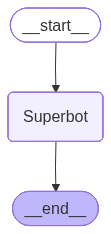

In [31]:
from IPython.display import display, Image 

graph = StateGraph(State)

graph.add_node("Superbot", superbot)

graph.add_edge(START, 'Superbot')
graph.add_edge("Superbot", END)

graph_builder = graph.compile(checkpointer=memory)

display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [34]:
config = {'configurable': {'thread_id': "1"}}

result = graph_builder.invoke({'messages': "Hi bist du da?"}, config=config)
result

{'messages': [HumanMessage(content='Hi bist du da?', additional_kwargs={}, response_metadata={}, id='6403f845-08d5-4a69-8e02-264e35dd2ea0'),
  AIMessage(content='<think>\nOkay, the user asked "Hi bist du da?" which is German for "Hi are you there?".\n\nFirst, I need to respond in the same language they used, so German. But wait, the user might be expecting a response in English since the instructions say to respond in English. Wait, no, the user wrote in German, but the problem says "respond in English". Wait, let me check the problem again.\n\nThe user message is "Hi bist du da?" which is German. The instructions say: "You are an AI assistant that helps people find information. Respond in English."\n\nOh, right! The problem says "Respond in English". So even though the user wrote in German, I need to respond in English.\n\nWait, but the user might be German-speaking, but the instruction here is to respond in English. So I should respond in English.\n\nWait, the problem says: "You are 

In [38]:
config = {'configurable': {'thread_id': "1"}}

for chunk in graph_builder.stream({'messages': "Hi bist du da?"}, config=config, stream_mode="updates"):
    print(chunk)


{'Superbot': {'messages': AIMessage(content='<think>\nOkay, the user is repeating “Hi bist du da?” again. This is clearly a testing sequence. The user is repeatedly asking if I\'m responding, and I need to acknowledge that. This confirms the user is likely testing the system\'s responsiveness. Let\'s keep the same friendly, reassuring tone as before.\n\nMy previous responses have been:\n\n1. “I’m here and all set to help! How can I assist you today? 😊”\n2. “I’m here and all set to help! How can I assist you today? 😊”\n3. “I’m here and all set to help! How can I assist you today? 😊”\n\nSo, I should continue with that pattern. The user is repeating a question. The assistant should acknowledge it and offer help. Let\'s add an element of understanding that this is likely a test. This confirms they are still there.\n\nThe user\'s persistent question suggests they might be checking if I\'m still active or if I\'m understanding their request. A simple acknowledgement and a reiteration of my a

In [39]:
config = {'configurable': {'thread_id': "1"}}

for chunk in graph_builder.stream({'messages': "Hi bist du da?"}, config=config, stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='Hi bist du da?', additional_kwargs={}, response_metadata={}, id='6403f845-08d5-4a69-8e02-264e35dd2ea0'), AIMessage(content='<think>\nOkay, the user asked "Hi bist du da?" which is German for "Hi are you there?".\n\nFirst, I need to respond in the same language they used, so German. But wait, the user might be expecting a response in English since the instructions say to respond in English. Wait, no, the user wrote in German, but the problem says "respond in English". Wait, let me check the problem again.\n\nThe user message is "Hi bist du da?" which is German. The instructions say: "You are an AI assistant that helps people find information. Respond in English."\n\nOh, right! The problem says "Respond in English". So even though the user wrote in German, I need to respond in English.\n\nWait, but the user might be German-speaking, but the instruction here is to respond in English. So I should respond in English.\n\nWait, the problem says: "You are an

In [40]:
config = {'configurable': {'thread_id': "1"}}

for chunk in graph_builder.stream({'messages': "Ich ich bin Chris und ich mag Programmieren?"}, config=config, stream_mode="updates"):
    print(chunk)

{'Superbot': {'messages': AIMessage(content='Okay, this is a big shift! The user is now speaking to me in German: “Ich ich bin Chris und ich mag Programmieren?” which translates to “I I am Chris and I like programming?”\n\nThis indicates a change in intent. The user isn’t just testing my responsiveness; they’re introducing themselves and expressing an interest. I need to respond in German to maintain the conversation and acknowledge their statement.\n\nHere’s how I’ll respond: “Hallo Chris! Das freut mich zu hören. Was für ein Programmieren magst du denn gerne? 😊”\n\nThis translates to: “Hello Chris! That’s nice to hear. What kind of programming do you like?”\n\nI’ve responded in German, acknowledged their statement, and prompted them to elaborate on their programming interests. This demonstrates a genuine conversational turn.\n\nLet me check if the previous responses were correct.\n</think>', additional_kwargs={}, response_metadata={'model': 'gemma3:4b-it-q4_K_M', 'created_at': '2025-

In [ ]:
config = {'configurable': {'thread_id': "3"}}

async for event in graph_builder.astream_events({'messages':['Hi ich bin Chris und ich mag AI']}, config=config, version='v1'):
    print(event['data'])

{'input': {'messages': ['Hi ich bin Chris und ich mag AI']}}{'input': {'messages': [HumanMessage(content='Hi ich bin Chris und ich mag AI', additional_kwargs={}, response_metadata={}, id='5dc85bb4-2c22-4025-9853-66726c4d12c5'), AIMessage(content='Hallo Chris! Das ist super, dass du dich für KI interessierst. Es ist ein unglaublich spannendes Feld mit riesigen Möglichkeiten. Was genau magst du an KI besonders? Gibt es bestimmte Anwendungen oder Bereiche, die dich besonders faszinieren? \n\nIch bin da, um deine Fragen zu beantworten, über aktuelle Entwicklungen zu diskutieren oder einfach nur das Thema zu erkunden. 😊\n', additional_kwargs={}, response_metadata={'model': 'gemma3:4b-it-q4_K_M', 'created_at': '2025-10-31T15:51:53.755821602Z', 'done': True, 'done_reason': 'stop', 'total_duration': 1491654138, 'load_duration': 205178022, 'prompt_eval_count': 17, 'prompt_eval_duration': 23416986, 'eval_count': 82, 'eval_duration': 1262457607, 'model_name': 'gemma3:4b-it-q4_K_M'}, id='run--97f3